# Problem 6.8

Starting with our equation (6.75) for the grid phase speed

\begin{equation*}
    c^{\text{grid}} = \frac{2}{k\,\Delta t} \arcsin \left\{ c\,\Delta t \:\left[ \left( \frac{\sin\left( \frac{1}{2}k_x\,\Delta x \right)}{\Delta x}\right)^2  +   \left( \frac{\sin\left( \frac{1}{2}k_y\,\Delta y \right)}{\Delta y}\right)^2  \right]^{1/2} \right\}
\end{equation*}

This is written slightly differently to the textbook, collecting the powers of 2 on the sine functions and $\Delta x$/$\Delta y$ outside of a bracket. Hopefully this makes it clearer for the next step of our solution. 


The fact that the question tells us to use $ k_x^2 + k_y^2 = k^2 $ hints we should aim to extract the $k_x$ and $k_y$ from the sine functions. In fact, when $\Delta x$ and $\Delta y$ are small, and the argument of the sine functions tends to 0. The small-angle approximation states that as $\theta \rightarrow 0 $ the sine function 

\begin{equation*}
\sin(\theta) \rightarrow \theta
\end{equation*}

Therefore since $\Delta x \rightarrow 0$ and $\Delta y \rightarrow 0$ we may approximate 

\begin{align*}
\sin\left( \frac{1}{2}k_x\,\Delta x \right) &\rightarrow  \frac{1}{2} k_x \, \Delta x  \\
\sin\left( \frac{1}{2}k_y\,\Delta y \right) &\rightarrow  \frac{1}{2} k_y \, \Delta y
\end{align*}

The equation for the grid speed then becomes 

\begin{equation*}
    c^{\text{grid}} = \frac{2}{k\,\Delta t} \arcsin \left\{ c\,\Delta t \:\left[ \left( \frac{\frac{1}{2}k_x\,\Delta x}{\Delta x}\right)^2  +   \left( \frac{\frac{1}{2}k_y\,\Delta y}{\Delta y}\right)^2  \right]^{1/2} \right\}
\end{equation*}


which may be reduced to 

\begin{equation*}
    c^{\text{grid}} = \frac{2}{k\,\Delta t} \arcsin \left\{ c\,\Delta t \:\left[ \frac{1}{4} \left( k_x^2 + k_y^2 \right)  \right]^{1/2} \right\}
\end{equation*}

Next, we utilise the aforementioned information that $k_x^2 + k_y^2 = k^2$ such that this simplifies to 
\begin{equation*}
    c^{\text{grid}} = \frac{2}{k\,\Delta t} \arcsin \left\{ \frac{1}{2} c\,\Delta t \: k \right\}
\end{equation*}

Finally, dealing we must navigate the limit of the $\arcsin$ as $\Delta t \rightarrow 0$. A Taylor expansion of $\arcsin(\Delta t)$ about 0 is 
\begin{equation*}
\Delta t + \frac{1}{6}(\Delta t)^3 + \mathcal{O}(\Delta t^5) \quad.
\end{equation*}
Hence to first order we may approximate the arcsin function in this limit as simply its argument, making the speed as  

\begin{equation*}
    c^{\text{grid}} = \frac{1}{2}  c\,\Delta t \: k \frac{2}{k\,\Delta t}  = c 
\end{equation*}

as required. 

## How wrong is the grid speed?

The phase speed on the grid is, as above, 

\begin{equation*}
    c^{\text{grid}} = \frac{2}{k\,\Delta t} \arcsin \left\{ c\,\Delta t \:\left[ \left( \frac{\sin\left( \frac{1}{2}k_x\,\Delta x \right)}{\Delta x}\right)^2  +   \left( \frac{\sin\left( \frac{1}{2}k_y\,\Delta y \right)}{\Delta y}\right)^2  \right]^{1/2} \right\}
\end{equation*}

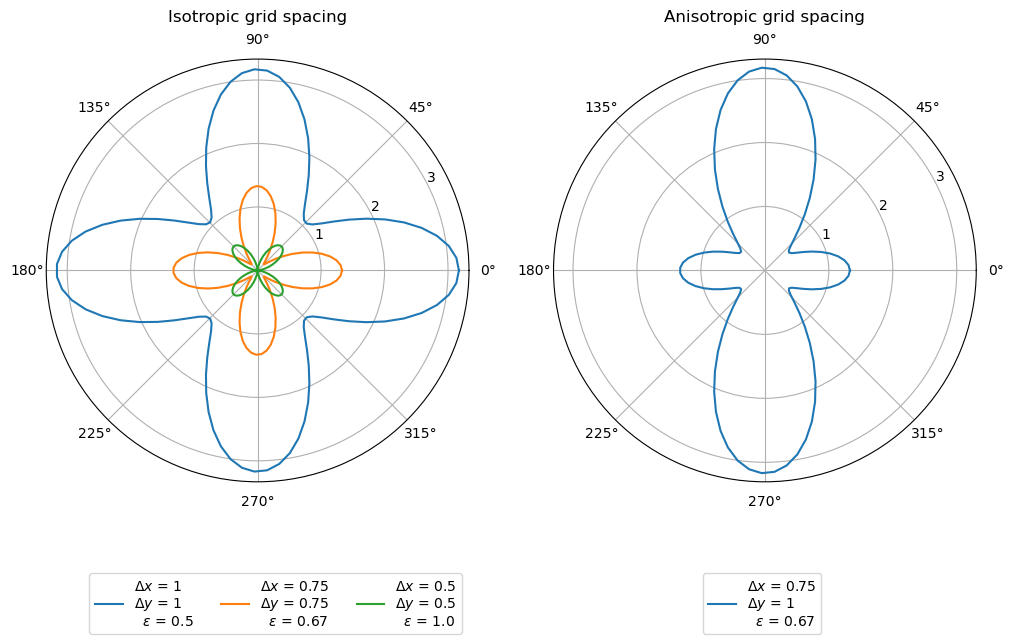

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 


k  = 1       # Wavenumber
DX = [1, 0.75, 0.5,  0.75]       # grid spacing in x
DY = [1, 0.75, 0.5,  1]       # grid spacing in y
dt = 0.5     # timestep
c  = 1       # true wavespeed 


courant_x = c*dt/np.array(DX);
courant_y = c*dt/np.array(DY);

nscenarios = len(DX)

# Create angle over which to evaluate
# x and y given by cos and sin of theta
theta = np.linspace(0, 2*np.pi, 100)

fig, axes = plt.subplots(1, 2, figsize=(12,6), subplot_kw={'projection': 'polar'})

leglabels = []

for i in range(nscenarios): 
    
    if i < nscenarios-1: 
        ax = axes[0]
        ax.set_title("Isotropic grid spacing", va='bottom')
        bbox = (1, -0.2)

    else:
        ax = axes[1]
        ax.set_title("Anisotropic grid spacing", va='bottom')
        bbox = (0.65, -0.2)


    dx = DX[i]
    dy = DY[i]
    # Compute grid speed at each theta
    cgrid = (2/(k*dt)) * np.arcsin( c*dt * ((np.sin(k*np.cos(theta) * dx/2)/dx)**2 +   
                                            (np.sin(k*np.sin(theta) * dy/2)/dy)**2)**0.5)

    # Compute percentage error from 'true' c
    deltac  = 100*np.abs((cgrid - c))/c 
    
    ax.plot(theta, deltac)
    ax.set_rlabel_position(27)  # Move radial labels away from plotted line
    ax.set_rticks([1, 2, 3])    # Less radial ticks

    leglabels.append(r'$\Delta x$ = ' +f'{dx}\n' + r'$\Delta y$ = '+f'{dy}\n' 
                     + r'  $\epsilon$ = '+f'{np.around(courant_x[i],2)}')
    
    if i >= nscenarios-2: 
        ax.legend(leglabels, ncols=3, bbox_to_anchor=bbox)
        leglabels = []